In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
# STEP 3: Load the dataset
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
print("Sample transaction:", transactions[0])

C:\Users\Vishma A S\AppData\Local\Temp\ipykernel_16920\2855008785.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column


Sample transaction: ['whole milk', 'pastry', 'salty snack']


In [5]:
# STEP 5: Transaction Encoding (One-Hot)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False).head()

,support,itemsets
36,0.157923,(whole milk)
24,0.122101,(other vegetables)
28,0.110005,(rolls/buns)
32,0.097106,(soda)
37,0.085879,(yogurt)


In [7]:
# STEP 7: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift


In [10]:
rules.to_csv("association_rules.csv", index=False)
print("✅ Association rules saved to association_rules.csv")

✅ Association rules saved to association_rules.csv


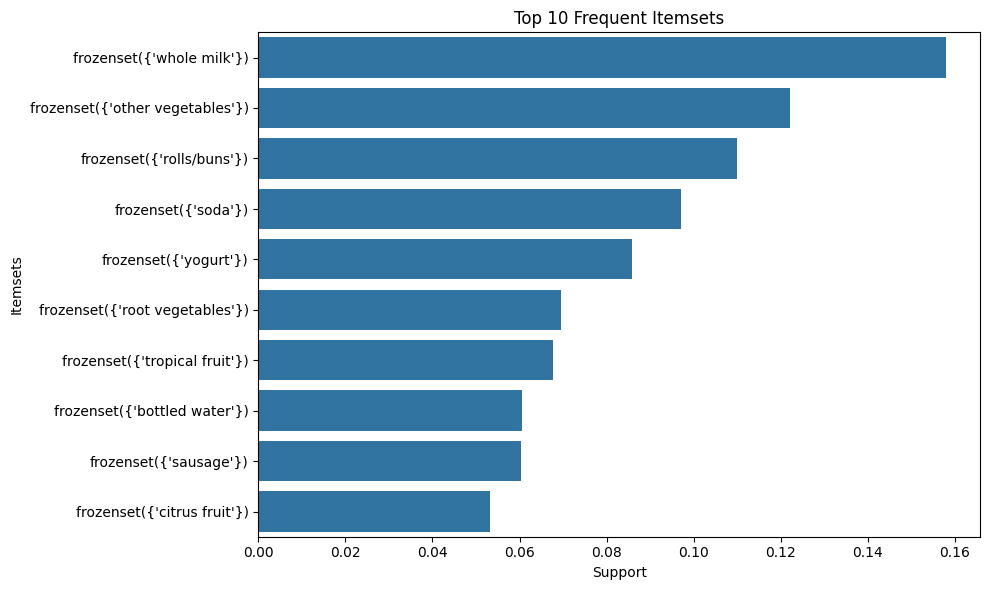

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort frequent itemsets by support
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items['support'], y=top_items['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


C:\Users\Vishma A S\AppData\Local\Temp\ipykernel_16920\2611818380.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', sizes=(40, 400), palette='coolwarm')
C:\Users\Vishma A S\AppData\Local\Temp\ipykernel_16920\2611818380.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lift', loc='upper right')


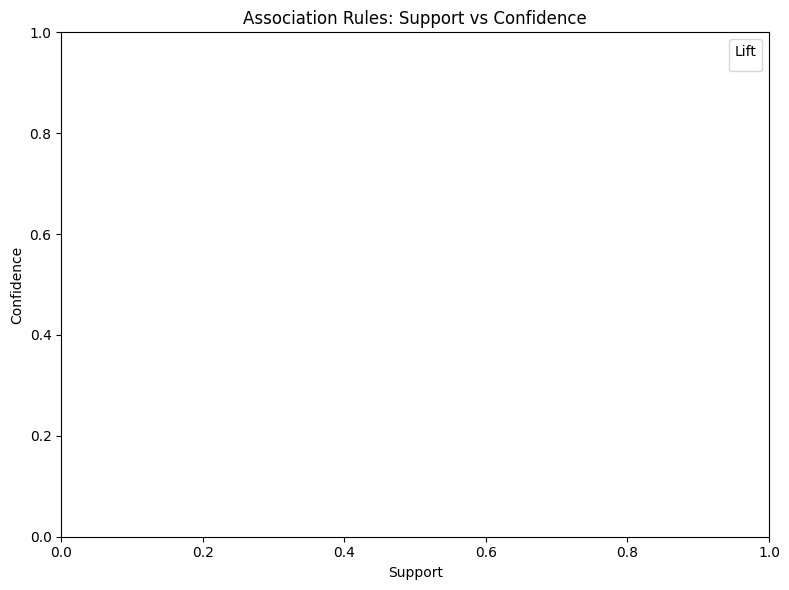

In [16]:
# Scatter plot of support vs confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', sizes=(40, 400), palette='coolwarm')
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right')
plt.tight_layout()
plt.show()


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Sort rules by lift and get top 10
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Step 2: Initialize graph
G = nx.DiGraph()

# Step 3: Build edges from antecedents to consequents
for _, row in top_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])

    if antecedents and consequents:
        for ant in antecedents:
            for cons in consequents:
                G.add_edge(ant, cons, weight=row['lift'])

# Step 4: Check if graph has nodes and edges
print(f"📊 Number of nodes: {G.number_of_nodes()}, Number of edges: {G.number_of_edges()}")

# Step 5: Draw if not empty
if G.number_of_edges() > 0:
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1)
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    nx.draw(
        G, pos,
        with_labels=True,
        node_color='lightblue',
        edge_color=edge_weights,
        width=2.0,
        edge_cmap=plt.cm.Blues,
        font_size=10,
        node_size=3000
    )
    plt.title('Top 10 Association Rules Network Graph (by Lift)')
    plt.show()
else:
    print("⚠️ No edges to draw. Try reducing min_support or min_threshold to generate more rules.")


📊 Number of nodes: 0, Number of edges: 0
⚠️ No edges to draw. Try reducing min_support or min_threshold to generate more rules.
